# Isolation Forest model testing

This notebook contains the implementation of isolation forest.

In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.7 MB/s eta 0:00:00


In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import nbformat
from nbconvert import HTMLExporter
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import shap

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/Fontys/data/elastic_may2021_malicious_data.csv')
df.head(5)

,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_network_transport,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label
0,EAT/////AP//////CP8AAAEKauwfwKhUn/AjZuY,False,190.215.171.15,53.181.147.225,259047.0,tcp,2021-05-23T13:57:50.000Z,1320579731159,9200.0,58982.0,benign
1,EAT/////AP//////CP8AAAHAqFSfwKhUoGbm8CM,False,190.215.171.15,190.215.171.36,259047.0,tcp,2021-05-23T13:57:50.000Z,1320579679339,9200.0,58982.0,benign
2,EAT/////AP//////CP8AAAEKauwfwKhUn/AjBOY,False,190.215.171.15,53.181.147.225,200483.0,tcp,2021-05-23T13:57:50.000Z,1320002683772,9200.0,58884.0,benign
3,EAT/////AP//////CP8AAAHAqFSfwKhUoATm8CM,False,190.215.171.15,190.215.171.36,200483.0,tcp,2021-05-23T13:57:50.000Z,1320002617659,9200.0,58884.0,benign
4,EAT/////AP//////CP8AAAEKauwfwKhUn/Ajxt0,False,190.215.171.15,53.181.147.225,1677693.0,tcp,2021-05-23T13:57:50.000Z,1320003230185,9200.0,56774.0,benign


In [ ]:
len(df["_source_flow_id"].unique())
len(df)

1954212

In [ ]:
selected_rows = df[df['_source_flow_id'] == "EAT/////AP//////CP8AAAEKauwfwKhUn/Ajxt0"]

selected_rows

,_source_flow_id,_source_flow_final,_source_source_ip,_source_destination_ip,_source_network_bytes,_source_network_transport,_source_@timestamp,_source_event_duration,_source_destination_port,_source_source_port,label
4,EAT/////AP//////CP8AAAEKauwfwKhUn/Ajxt0,False,190.215.171.15,53.181.147.225,1677693.0,tcp,2021-05-23T13:57:50.000Z,1320003230185,9200.0,56774.0,benign
276,EAT/////AP//////CP8AAAEKauwfwKhUn/Ajxt0,False,190.215.171.15,53.181.147.225,1680413.0,tcp,2021-05-23T13:58:10.000Z,1340292600970,9200.0,56774.0,benign
539,EAT/////AP//////CP8AAAEKauwfwKhUn/Ajxt0,False,190.215.171.15,53.181.147.225,1679053.0,tcp,2021-05-23T13:58:00.001Z,1330245371872,9200.0,56774.0,benign
796,EAT/////AP//////CP8AAAEKauwfwKhUn/Ajxt0,False,190.215.171.15,53.181.147.225,1681637.0,tcp,2021-05-23T13:58:20.000Z,1349886084713,9200.0,56774.0,benign
1046,EAT/////AP//////CP8AAAEKauwfwKhUn/Ajxt0,False,190.215.171.15,53.181.147.225,1676333.0,tcp,2021-05-23T13:57:40.000Z,1310017626989,9200.0,56774.0,benign
...,...,...,...,...,...,...,...,...,...,...,...
1953238,EAT/////AP//////CP8AAAEKauwfwKhUn/Ajxt0,False,190.215.171.15,53.181.147.225,11473912.0,tcp,2021-05-24T15:38:48.532Z,86086597346947,9200.0,56774.0,benign
1953447,EAT/////AP//////CP8AAAEKauwfwKhUn/Ajxt0,False,190.215.171.15,53.181.147.225,11481800.0,tcp,2021-05-24T15:39:48.533Z,86146262268517,9200.0,56774.0,benign
1953654,EAT/////AP//////CP8AAAEKauwfwKhUn/Ajxt0,False,190.215.171.15,53.181.147.225,11477856.0,tcp,2021-05-24T15:39:18.532Z,86116454059159,9200.0,56774.0,benign
1953861,EAT/////AP//////CP8AAAEKauwfwKhUn/Ajxt0,False,190.215.171.15,53.181.147.225,11476496.0,tcp,2021-05-24T15:39:08.532Z,86106405003620,9200.0,56774.0,benign


In [ ]:

# Pivot the DataFrame
pivot_df = df.pivot_table(index='_source_flow_id', margins=True)

# Flatten the multi-level columns
# pivot_df.columns = [' '.join(col).strip() for col in pivot_df.columns.values]

# Reset the index
pivot_df.reset_index(inplace=True)

# Fill any NaN values with appropriate defaults
pivot_df.fillna(0, inplace=True)
# Display the result
pivot_df.tail(5)

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.


In [ ]:
# Group the DataFrame by _source_flow_id and calculate aggregate statistics
grouped_df = df.groupby('_source_flow_id').agg({
    '_source_flow_final': 'first',
    '_source_source_ip': 'first',
    '_source_destination_ip': 'first',
    '_source_network_bytes': 'sum',
    '_source_network_transport': 'first',
    '_source_@timestamp': 'first',
    '_source_event_duration': 'sum',
    '_source_destination_port': 'first',
    '_source_source_port': 'first',
    'label': 'first'  # Assuming 'label' is the same for all rows in the group
})

# Reset the index to make _source_flow_id a regular column
grouped_df.reset_index(inplace=True)

In [ ]:
pivot_df.isnull().sum()

_source_flow_id                       0
_source_destination_port benign       0
_source_destination_port malicious    0
_source_event_duration benign         0
_source_event_duration malicious      0
_source_flow_final benign             0
_source_flow_final malicious          0
_source_network_bytes benign          0
_source_network_bytes malicious       0
_source_source_port benign            0
_source_source_port malicious         0
dtype: int64

## Cleaning the data

Here we delete the whole row when NaN values appear.

In [ ]:
# Removing all null values
df = df.dropna()
df.isnull().sum()

_source_flow_id              0
_source_flow_final           0
_source_source_ip            0
_source_destination_ip       0
_source_network_bytes        0
_source_network_transport    0
_source_@timestamp           0
_source_event_duration       0
_source_destination_port     0
_source_source_port          0
label                        0
dtype: int64

We can also check the columns that had null values to see if they are properly deleted.

In [ ]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Series([], dtype: int64)

## Data Balancing

In [ ]:
# Printing the value count for each label - malicious and benign
df['label'].value_counts()

benign       1850514
malicious     102656
Name: label, dtype: int64

In [ ]:
counts = df['label'].value_counts(normalize=True) * 100
print(counts)

benign       94.744134
malicious     5.255866
Name: label, dtype: float64


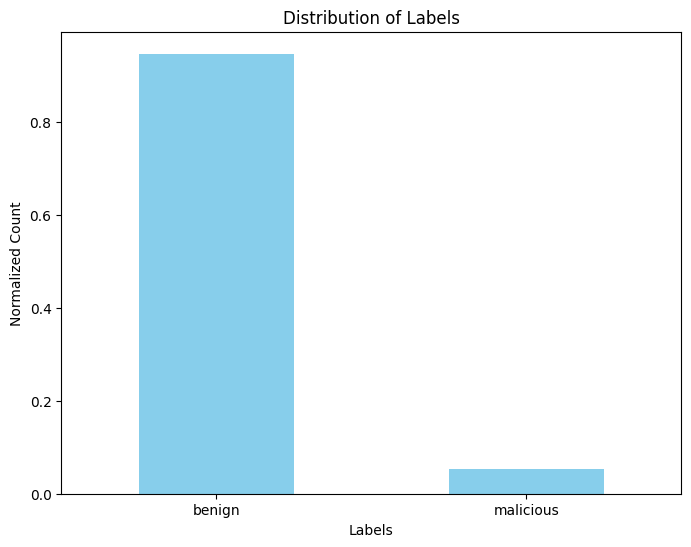

In [ ]:
value_counts = df['label'].value_counts(normalize=True)

# Creating a bar plot
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Normalized Count')
plt.xticks(rotation=0)
plt.show()

We can observe that the rows with benign label are much more compared to the malicius, meaning the dataset is highly disbalanced. To fix that we create two dataset with undersampled and oversampled data.

First we divide the dataset into X and y. X containing the data of all features without the label, while y contains only the label.

In [ ]:
X = df.drop('label', axis=1)
y = df['label']

Next we exclude every feature that is non numeric. We do that by first selecting the object features and then dropping them from the dataset.

In [ ]:
# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns

# Drop or encode non-numeric columns
X = X.drop(columns=non_numeric_cols)

### Train Test Split

Lastly we split the two balanced dataset into train and test set.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

## Isolation Forest model testing

Here we import isolation forest from sklearn and experiment with the different datasets and parameters.

Isolation forest has the following parameters:

- n_estimators:

  The number of base decision trees used to build the ensemble Isolation Forest model.
    A higher value generally leads to better anomaly detection performance but increases computational cost.
    Balance this value based on your dataset size and computational resources.

- contamination:

  The expected proportion of anomalies (outliers) in the dataset.
    It helps control the sensitivity to anomalies; lower values assume fewer anomalies, higher values assume more anomalies.

- max_samples:

  The maximum number of samples drawn from the dataset to create each base decision tree.
    Smaller values can lead to more random and diverse trees but may reduce model performance.

- max_features:

  The maximum number of features (attributes) used when splitting a node in a decision tree.
    Controlling this parameter can influence the diversity and randomness of the individual trees.


- random_state:

  A seed for the random number generator, ensuring reproducibility of results.
    Set to a specific value for consistent results across different runs.

In [ ]:
# First we'll try to run it setting only the contamination to a low value
# After the results we can experiment with the other parameters
model = IsolationForest(contamination=0.0005, n_estimators=256, random_state=17)

# Fit the model to the training data
model.fit(X_train)

X does not have valid feature names, but IsolationForest was fitted with feature names


IsolationForest(contamination=0.0005, n_estimators=256, random_state=17)

In [ ]:
# Predict anomalies on the test data
y_pred = model.predict(X_test)

In [ ]:
# Convert string labels to integers in y_true
y_true = [1 if label == 'benign' else -1 for label in y_test]
# Therefore 1 is for benign and -1 for malicious

print("\nClassification Report:\n", classification_report(y_true, y_pred))
print("\nAccuracy Score:", accuracy_score(y_true, y_pred))


Classification Report:
               precision    recall  f1-score   support

          -1       0.18      0.17      0.18     30904
           1       0.95      0.96      0.96    555047

    accuracy                           0.92    585951
   macro avg       0.57      0.56      0.57    585951
weighted avg       0.91      0.92      0.91    585951


Accuracy Score: 0.915556078921275


From the first run we got an accuracy of 0.91, which is very low for our case. We should aim to minimal error. Below is a confusion matrix to show what the model predicted wrong.

In [ ]:
cm = confusion_matrix(y_true, y_pred)

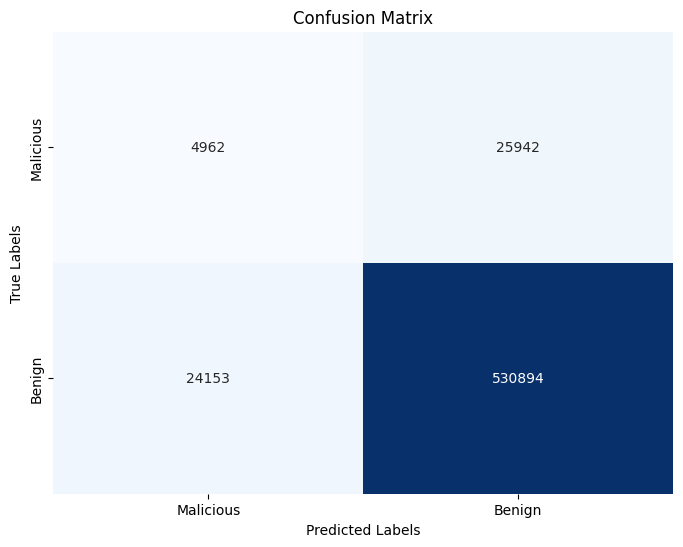

In [ ]:
class_names = ['Malicious', 'Benign']
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix in heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Based on the confusion matrix, we see that we have a lot of false positives, meaning the model predicted almost 26k times that a malicious data is benign and only 5k as correct prediction (TP). There are also quite a lot of false negatives, meaning the model predicted 24k times benign data as malicious. The results are quite poor and the model needs optimization.

Next step is to see the feature importance. We can do that using the SHAP explainer

In [ ]:
explainer = shap.Explainer(model)

In [ ]:
shap_values = explainer.shap_values(X)

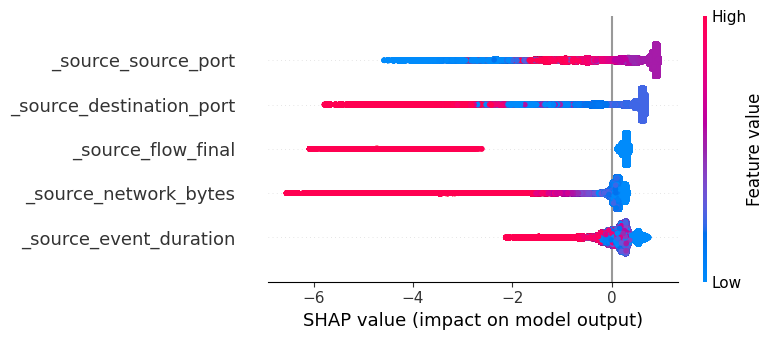

In [ ]:
shap.summary_plot(shap_values, X)

Based on the graph we can see that the source port, destination port and network bytes have more impact on the model than the other features. Specifically destination port and network bytes - if the value is higher, there is higher negative impact on the model based on these features.

## Grid Search and hyper-parameter optimization

Here we can create a parameter grid which we can then insert into GridSearchCV. At the end it will select the best combination of parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Creating the parameters grid. We start with 4 values for n_estimators and 4 for contamination
param_grid = {
    'n_estimators': [4, 32, 128, 256],
    'contamination': [0.004, 0.004, 0.04, 0.4],
    'max_samples':[8,32,1024,8970]
}


In [ ]:
import numpy as np
# Again convering the y_train label to 1 and -1
y_true_train = np.where(y_train == "benign",1,-1)

In [ ]:
model = IsolationForest(random_state=17)

# Creating the grid search with 5 different test splits (cv=5)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=2)

# Running the grid search
# It will test 64 parameters combinations by 2 data splits, meaning it will run 128 combinations in total (4x4x4x2)
grid_search.fit(X_train.values, y_true_train)

GridSearchCV(cv=2, estimator=IsolationForest(random_state=17),
             param_grid={'contamination': [0.004, 0.004, 0.04, 0.4],
                         'max_samples': [8, 32, 1024, 8970],
                         'n_estimators': [4, 32, 128, 256]},
             scoring='f1')

In [ ]:
# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test.values)

y_test  = np.where(y_test == "benign",1,-1)

print("Best Hyperparameters:", best_params)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Best Hyperparameters: {'contamination': 0.004, 'max_samples': 8, 'n_estimators': 4}
Accuracy Score: 0.9472583885000623


In [ ]:
# First we'll try to run it setting only the contamination to a low value
# After the results we can experiment with the other parameters

# max_samples perform best when its between 512 and 1024 if number. In this case is set to auto
model = IsolationForest(contamination=0.1, n_estimators=4, max_samples='auto', random_state=17)

# Fit the model to the training data
model.fit(X_train.values)

IsolationForest(contamination=0.1, n_estimators=4, random_state=17)

In [ ]:
y_pred = model.predict(X_test.values)

In [ ]:
# Convert string labels to integers in y_true
y_true = [1 if label == 'benign' else -1 for label in y_test]
# Therefore 1 is for benign and -1 for malicious

print("\nClassification Report:\n", classification_report(y_true, y_pred))
print("\nAccuracy Score:", accuracy_score(y_true, y_pred))


Classification Report:
               precision    recall  f1-score   support

          -1       0.30      0.58      0.40     30904
           1       0.98      0.93      0.95    555047

    accuracy                           0.91    585951
   macro avg       0.64      0.75      0.67    585951
weighted avg       0.94      0.91      0.92    585951


Accuracy Score: 0.9078728426097062


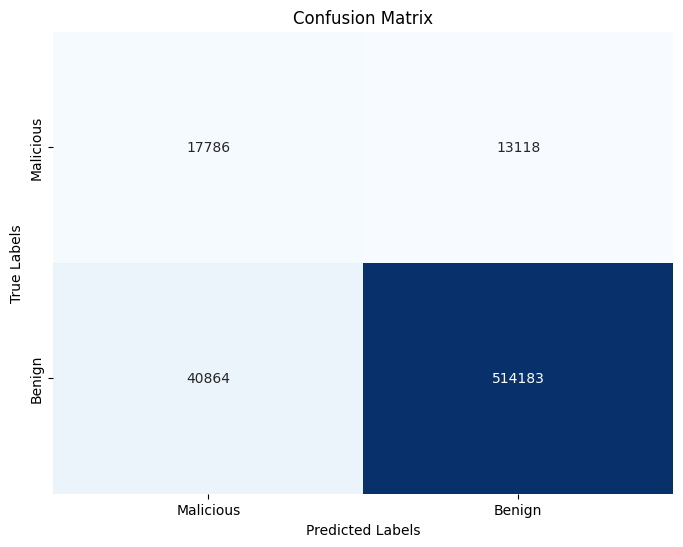

In [ ]:
class_names = ['Malicious', 'Benign']
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix in heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Undersampled dataset

We are testing the same model with the undersampled dataset.

In [86]:
x_train_u = pd.read_csv('/content/drive/My Drive/Fontys/data/X_train_u.csv')
y_train_u = pd.read_csv('/content/drive/My Drive/Fontys/data/y_train_u.csv')

x_test_u = pd.read_csv('/content/drive/My Drive/Fontys/data/X_test_u.csv')
y_test_u = pd.read_csv('/content/drive/My Drive/Fontys/data/y_test_u.csv')


x_train_u = x_train_u.drop(columns=x_train_u.select_dtypes(include=['object']).columns)
x_test_u = x_test_u.drop(columns=x_test_u.select_dtypes(include=['object']).columns)


label_mapping = {"benign": 1, "malicious": -1}
y_test_u['label'] = y_test_u['label'].map(label_mapping)

In [112]:
model = IsolationForest(contamination=0.45, n_estimators=4, max_samples=512, random_state=17)

# Fit the model to the training data
model.fit(x_train_u.values)

IsolationForest(contamination=0.45, max_samples=512, n_estimators=4,
                random_state=17)

In [113]:
y_pred = model.predict(x_test_u.values)

In [114]:
print("\nClassification Report:\n", classification_report(y_test_u.values, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test_u.values, y_pred))


Classification Report:
               precision    recall  f1-score   support

          -1       0.72      0.65      0.68     30782
           1       0.68      0.75      0.71     30812

    accuracy                           0.70     61594
   macro avg       0.70      0.70      0.70     61594
weighted avg       0.70      0.70      0.70     61594


Accuracy Score: 0.699126538299185


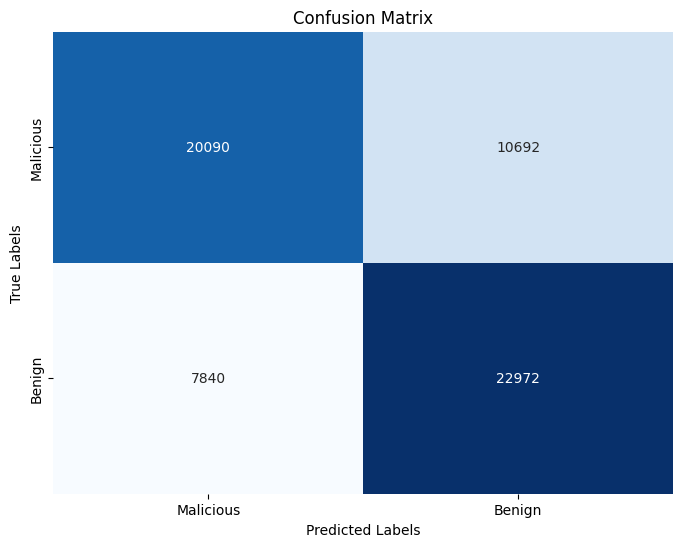

In [116]:
class_names = ['Malicious', 'Benign']
cm = confusion_matrix(y_test_u.values, y_pred)

# Plotting the confusion matrix in heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

With the undersampled dataset the model performed quite better catching the malicious data. However it still produces a lot of error with total accuracy of 69%, therefore further investigation must be done or the model should be switched.

## Export

In [ ]:
# Load the notebook
with open("/content/drive/MyDrive/Fontys/SUE/isolationforest.ipynb", "r", encoding="utf-8") as f:
    notebook = nbformat.read(f, as_version=4)

# Convert to HTML
html_exporter = HTMLExporter()
html_data, _ = html_exporter.from_notebook_node(notebook)

# Save the HTML data to a file
with open("/content/drive/MyDrive/Fontys/SUE/isolationforest.html", "w", encoding="utf-8") as f:
    f.write(html_data)